## Feature Engineering

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from ift6758.features.feature_engineering1 import SeasonDataSet
import numpy as np
import os
import random



In [15]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [16]:
train_years = [2015,2016,2017,2018]
test_years=[2019]


In [17]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015.pkl
Len of games_list in 2015 is 1325
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016.pkl
Len of games_list in 2016 is 1332
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017.pkl
Len of games_list in 2017 is 1376
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018.pkl
Len of games_list in 2018 is 1376


In [33]:
train_df[(train_df['gamePk']==2018020722)&(train_df['result.event']=='Goal')]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
292219,Goal,2018020722,Boston Bruins,1,04:39,REGULAR,15:21,-85.0,-22.0,Snap Shot,False,Power Play,David Pastrnak,Carter Hart,"(89, 0)",1,175.385290,7.206057
292226,Goal,2018020722,Boston Bruins,1,09:12,REGULAR,10:48,67.0,-16.0,Snap Shot,False,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,27.202941,36.027373
292229,Goal,2018020722,Philadelphia Flyers,1,12:44,REGULAR,07:16,-67.0,-12.0,Snap Shot,False,Even,Oskar Lindblom,Jaroslav Halak,"(-89, 0)",1,25.059928,-28.610460
292237,Goal,2018020722,Philadelphia Flyers,2,05:32,REGULAR,14:28,74.0,-12.0,Tip-In,False,Even,Sean Couturier,Jaroslav Halak,"(89, 0)",1,19.209373,38.659808
292241,Goal,2018020722,Philadelphia Flyers,2,06:47,REGULAR,13:13,-32.0,-6.0,Tip-In,False,Power Play,Sean Couturier,Jaroslav Halak,"(89, 0)",1,121.148669,2.838788
292272,Goal,2018020722,Philadelphia Flyers,3,15:53,REGULAR,04:07,-65.0,-18.0,Snap Shot,False,Even,Sean Couturier,Jaroslav Halak,"(-89, 0)",1,30.000000,-36.869898
292274,Goal,2018020722,Boston Bruins,3,18:54,REGULAR,01:06,78.0,7.0,Tip-In,False,Even,Peter Cehlarik,Carter Hart,"(89, 0)",1,13.038405,-32.471192


In [18]:
train_df[(train_df['distanceNet']>150)&(train_df['result.event']=='Goal')&(train_df['about.period']<3	)]

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
19,Goal,2015020001,Toronto Maple Leafs,2,00:19,REGULAR,19:41,-73.0,-1.0,Deflected,False,Power Play,James van Riemsdyk,Carey Price,"(89, 0)",1,162.003086,0.353673
707,Goal,2015020013,New York Rangers,1,19:16,REGULAR,00:44,69.0,8.0,Backhand,False,Even,Mats Zuccarello,Sergei Bobrovsky,"(-89, 0)",1,158.202402,2.898577
721,Goal,2015020013,Columbus Blue Jackets,2,10:59,REGULAR,09:01,77.0,-7.0,Wrist Shot,False,Even,Cam Atkinson,Henrik Lundqvist,"(-89, 0)",1,166.147525,-2.414657
812,Goal,2015020015,Chicago Blackhawks,1,13:28,REGULAR,06:32,76.0,-3.0,Backhand,False,Short Handed,Artem Anisimov,Thomas Greiss,"(-89, 0)",1,165.027270,-1.041627
823,Goal,2015020015,New York Islanders,2,05:22,REGULAR,14:38,79.0,3.0,Wrist Shot,False,Even,John Tavares,Corey Crawford,"(-89, 0)",1,168.026784,1.023030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281884,Goal,2018020555,Arizona Coyotes,1,19:55,REGULAR,00:05,-85.0,32.0,Wrist Shot,False,Even,Derek Stepan,Philipp Grubauer,"(89, 0)",1,176.918060,-10.420712
284815,Goal,2018020601,New York Islanders,2,02:59,REGULAR,17:01,-65.0,-6.0,Deflected,False,Even,Leo Komarov,Carter Hutton,"(89, 0)",1,154.116839,2.231175
292219,Goal,2018020722,Boston Bruins,1,04:39,REGULAR,15:21,-85.0,-22.0,Snap Shot,False,Power Play,David Pastrnak,Carter Hart,"(89, 0)",1,175.385290,7.206057
307010,Goal,2018020953,Pittsburgh Penguins,1,07:59,REGULAR,12:01,-82.0,2.0,Backhand,False,Even,Sidney Crosby,Brian Elliott,"(89, 0)",1,171.011696,-0.670096


In [25]:
df_features_y = train_df[["distanceNet","angleNet","isGoal"]]


In [26]:
df_features_y

,distanceNet,angleNet,isGoal
0,34.525353,10.007980,0
1,10.000000,0.000000,0
2,14.035669,-4.085617,0
3,49.517674,-46.636577,0
4,28.017851,-2.045408,0
...,...,...,...
332737,13.892444,30.256437,1
332738,21.189620,19.290046,0
332739,24.331050,-9.462322,0
332740,47.095647,-3.652223,0


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

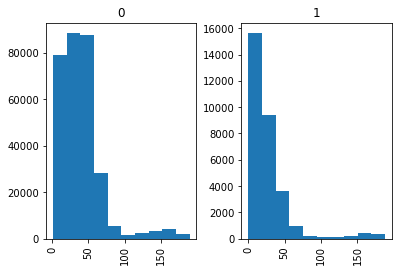

In [34]:
df_features_y.hist(column='distanceNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

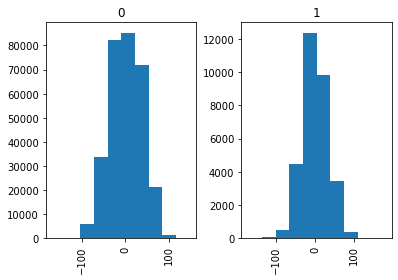

In [8]:
df_features_y.hist(column='angleNet', by='isGoal')

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

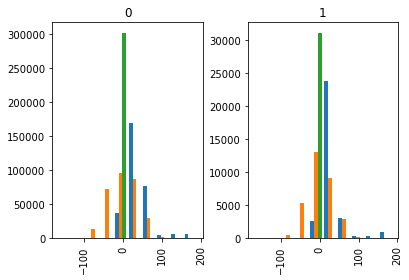

In [9]:
df_features_y.hist(column=['distanceNet', 'angleNet'], by='isGoal')